In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#load dataset
df = pd.read_csv('insurance (1).csv')
df = df[['age', 'bmi', 'children', 'charges']]

In [3]:
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [4]:
df.nunique()

age           47
bmi          548
children       6
charges     1337
dtype: int64

In [5]:
df.isnull().sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Preprocessing the dataset
#Encoding categorical variables
df = pd.get_dummies(df)


In [9]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('children',axis=1), df['children'], test_size=0.3)


In [10]:
# Create base classifiers
rf1 = RandomForestClassifier(n_estimators=50, random_state=42)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
lr = LogisticRegression(random_state=42)

# Create a heterogeneous ensemble classifier
hetero_rf = VotingClassifier(estimators=[('rf1', rf1), ('dt', dt), ('lr', lr)], voting='hard')

# Train the heterogeneous ensemble classifier on the training data
hetero_rf.fit(X_train, y_train)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf1',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('lr', LogisticRegression(random_state=42))])

In [11]:
# Make predictions on the testing data
y_pred = hetero_rf.predict(X_test)


In [15]:
#Evaluating performance
# Calculate accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.43283582089552236


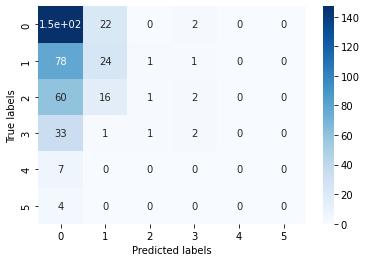

In [16]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()